In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0702.csv'
df = pd.read_csv(path)
df.head()

,Time,pH
0,1,7.02
1,1,6.93
2,2,6.42
3,2,6.51
4,4,6.07


In [ ]:
df.describe()

,Time,pH
count,10.000000,10.000000
mean,4.200000,6.120000
std,2.699794,0.583152
min,1.000000,5.360000
25%,2.000000,5.642500
50%,4.000000,6.030000
75%,6.000000,6.487500
max,8.000000,7.020000


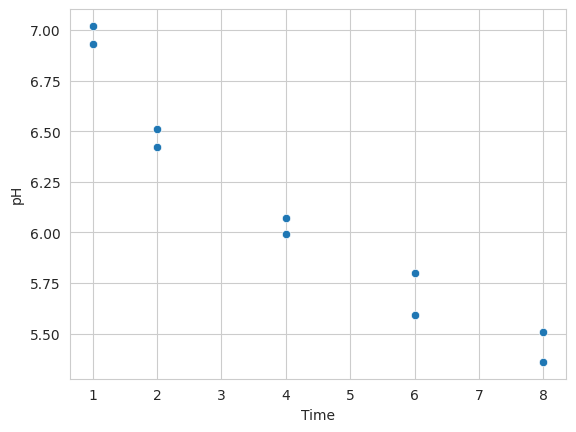

In [ ]:
sns.scatterplot(x = 'Time', y = 'pH', data = df)
plt.show()

In [ ]:
from statsmodels.formula.api import ols
lm_model = ols('pH ~ Time', data = df).fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.51e-06
Time:                        20:54:41   Log-Likelihood:                 5.2804
No. Observations:                  10   AIC:                            -6.561
Df Residuals:                       8   BIC:                            -5.956
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9965      0.097     72.199      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
est_means = lm_model.predict(df['Time'])
est_means

0    6.787805
1    6.787805
2    6.579116
3    6.579116
4    6.161738
5    6.161738
6    5.744360
7    5.744360
8    5.326982
9    5.326982
dtype: float64

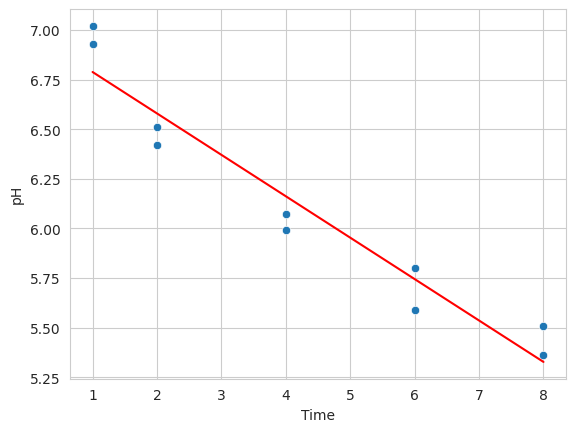

In [ ]:
sns.scatterplot(x = 'Time', y = 'pH', data = df)
plt.plot(df['Time'], est_means, color = 'red')
plt.show()

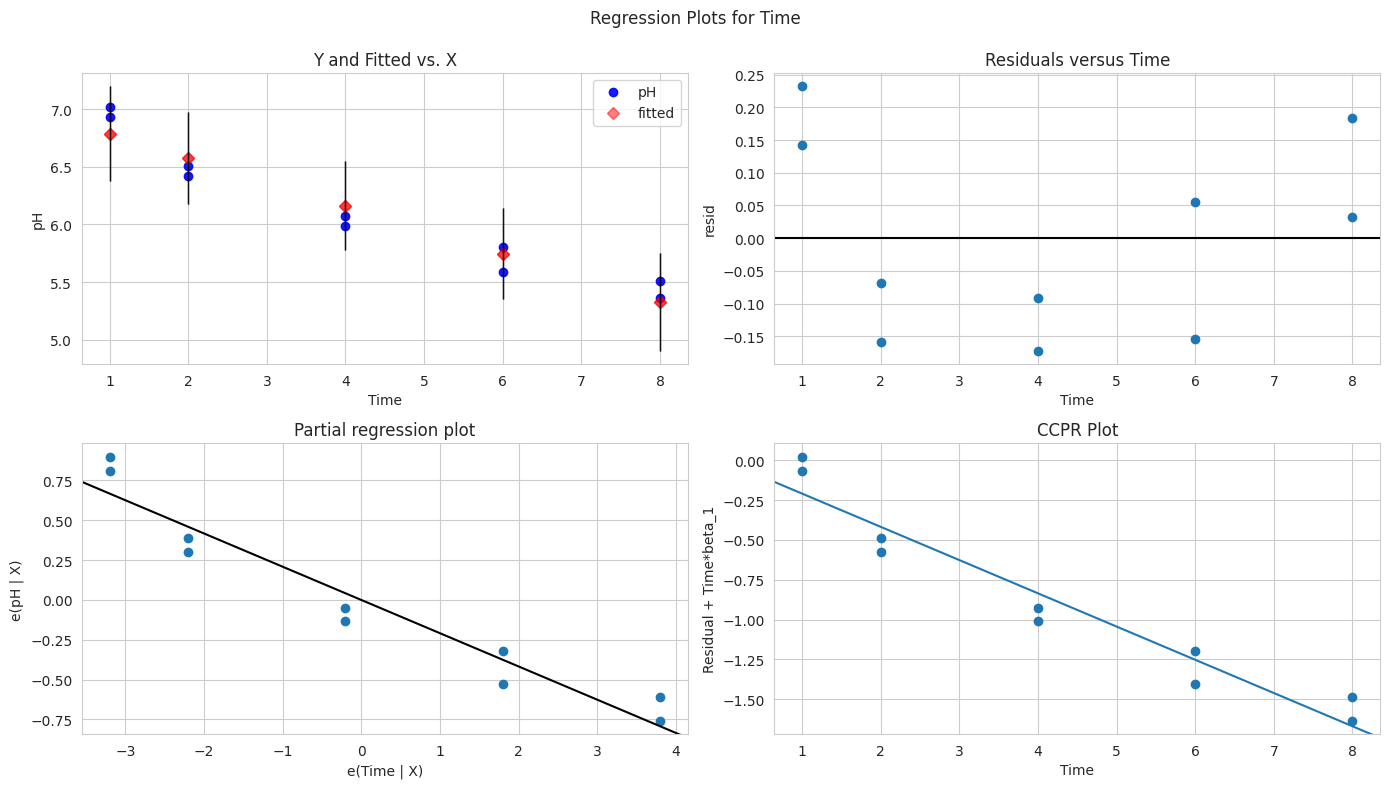

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize = (14, 8))

fig = sm.graphics.plot_regress_exog(lm_model, 'Time', fig = fig)

Text(0, 0.5, 'Residuals')

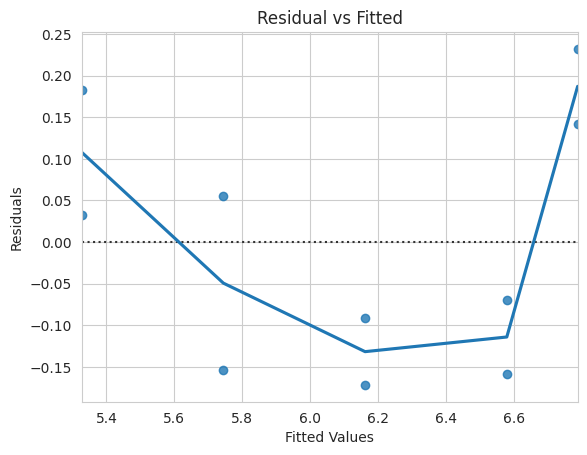

In [ ]:
model_fitted_y = lm_model.fittedvalues

plot = sns.residplot(x = model_fitted_y, y = 'pH', data = df, lowess = True)
plot.set_title("Residual vs Fitted")
plot.set_xlabel("Fitted Values")
plot.set_ylabel("Residuals")

In [ ]:
from scipy.stats import shapiro
shapiro(lm_model.resid)

ShapiroResult(statistic=0.9081600904464722, pvalue=0.2685903012752533)

In [ ]:
df['logTime'] = np.log(df['Time'])
df.head()

,Time,pH,logTime
0,1,7.02,0.000000
1,1,6.93,0.000000
2,2,6.42,0.693147
3,2,6.51,0.693147
4,4,6.07,1.386294


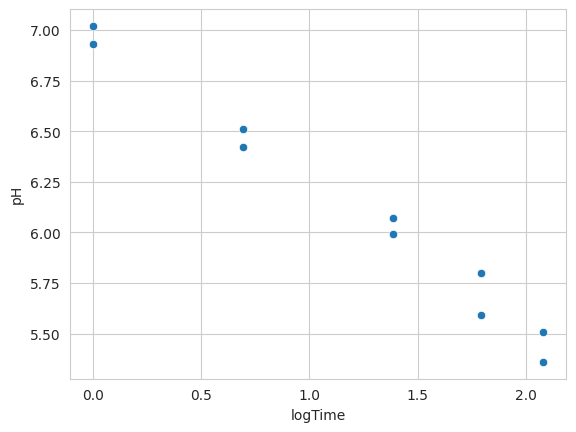

In [ ]:
sns.scatterplot(x = 'logTime', y = 'pH', data = df)
plt.show()

In [ ]:
log_model = ols('pH ~ logTime', data = df).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.70e-08
Time:                        21:16:45   Log-Likelihood:                 11.905
No. Observations:                  10   AIC:                            -19.81
Df Residuals:                       8   BIC:                            -19.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9836      0.049    143.897      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[]

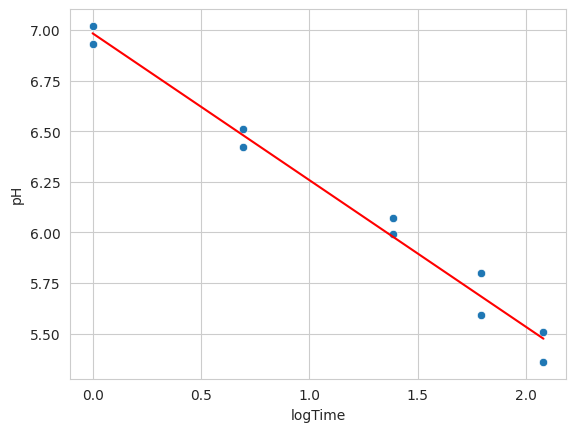

In [ ]:
sns.scatterplot(x = 'logTime',  y = 'pH', data = df)
plt.plot(df['logTime'], log_model.fittedvalues, color = 'red')
plt.plot()

Text(0, 0.5, 'Residuals')

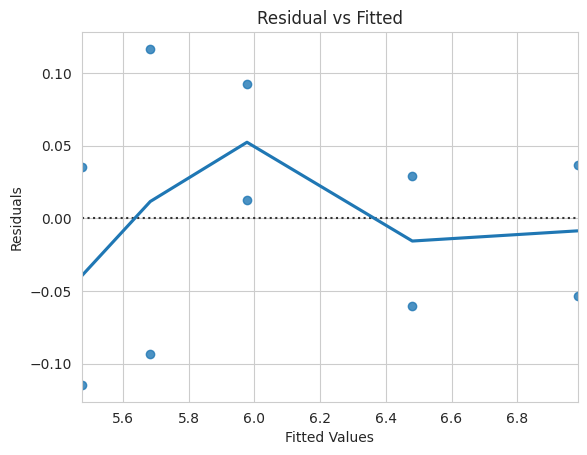

In [ ]:
model_fitted_y = log_model.fittedvalues

plot = sns.residplot(x = model_fitted_y, y = 'pH', data = df, lowess = True)
plot.set_title("Residual vs Fitted")
plot.set_xlabel("Fitted Values")
plot.set_ylabel("Residuals")

In [ ]:
shapiro(log_model.resid)

ShapiroResult(statistic=0.9450269341468811, pvalue=0.6101749539375305)